In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np
import datetime

In [9]:
# Study data files
amazon_daily_path = "Resources/amazon_daily_stock.csv"
netflix_daily_path = "Resources/netflix_daily_stock.csv"
covid_path = "Resources/covid_testing.csv"

In [10]:
amazon_daily = pd.read_csv(amazon_daily_path)
netflix_daily = pd.read_csv(netflix_daily_path)
covid_daily = pd.read_csv(covid_path)

In [11]:
amazon_covid_merge = pd.merge(amazon_daily, covid_daily ,how='outer', on="date")

In [15]:
#print(type(amazon_covid_merge['date']))

amazon_covid_merge['new_datetime'] = pd.to_datetime(amazon_covid_merge['date'])

In [16]:
print(type(amazon_covid_merge['new_datetime']))

<class 'pandas.core.series.Series'>


In [17]:
amazon_covid_merge.head()

,date,Open,High,Low,Close,Adj Close,Volume,death,deathIncrease,inIcuCumulative,...,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease,new_datetime
0,1/27/2020,1820.000000,1841.000000,1815.339966,1828.339966,1828.339966,3528500.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-27
1,1/28/2020,1840.500000,1858.109985,1830.020020,1853.250000,1853.250000,2808000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-28
2,1/29/2020,1864.000000,1874.750000,1855.020020,1858.000000,1858.000000,2088000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-29
3,1/30/2020,1858.000000,1872.869995,1850.609985,1870.680054,1870.680054,6327400.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-30
4,1/31/2020,2051.469971,2055.719971,2002.270020,2008.719971,2008.719971,15567300.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31


In [ ]:
amazon_covid_merge.head()

In [18]:
amazon_covid_merge['Month_year']= amazon_covid_merge['new_datetime'].dt.strftime('%Y-%m')

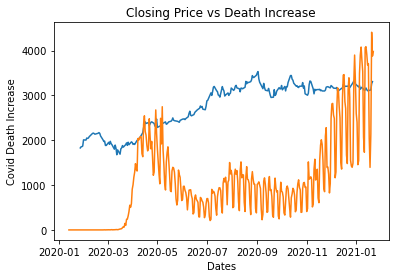

In [19]:


#x = amazon_covid_merge['Close']
#y = amazon_covid_merge['deathIncrease'].dropna()


#correlation = st.pearsonr(x,y)

# print correlation value
#print(f"""The correlation between death increment and closing price is {round(correlation[0],2)}.""")

# Calculate linear regression
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
#simple_regression = x * slope + intercept



# Plot linear regression on top of scatter plot
plt.plot(amazon_covid_merge['new_datetime'],amazon_covid_merge['Close'])
plt.plot(amazon_covid_merge['new_datetime'],amazon_covid_merge['deathIncrease'])
#plt.plot(x,simple_regression,"r-")



# add title and axis labels
plt.title('Closing Price vs Death Increase')
plt.xlabel("Dates")
plt.ylabel("Covid Death Increase")


plt.show()

In [20]:
month_groupby = amazon_covid_merge.groupby('Month_year')
month_groupby.describe()

Open                                                     \
           count         mean         std          min          25%   
Month_year                                                            
2020-01      5.0  1886.793994   93.636811  1820.000000  1840.500000   
2020-02     19.0  2065.853683   95.217165  1814.630005  2018.510010   
2020-03     22.0  1863.148626   90.505695  1641.510010  1788.539978   
2020-04     21.0  2216.111439  203.754240  1901.640015  2021.000000   
2020-05     20.0  2391.137012   56.810849  2256.379883  2365.352539   
2020-06     22.0  2608.350009  109.128363  2444.510010  2506.799988   
2020-07     22.0  3053.884100  117.686174  2757.989990  3002.399963   
2020-08     21.0  3241.426676  104.556890  3101.209961  3173.120117   
2020-09     21.0  3180.540946  169.306932  2906.500000  3054.860107   
2020-10     22.0  3241.358642   92.507103  3135.000000  3190.152588   
2020-11     20.0  3147.326501   77.656034  3018.530029  3099.130005   
2020-12     22.0  3199.929066   59.589814  3088.989990  3169.919922   
2021-01     13.0  3168.343844   55.503965  3107.000000  3128.439941   

                                                   High               ...  \
                    50%          75%          max count         mean  ...   
Month_year                                                            ...   
2020-01     1858.000000  1864.000000  2051.469971   5.0  1900.489990  ...   
2020-02     2071.020020  2147.944946  2173.070068  19.0  2094.268979  ...   
2020-03     1888.500000  1929.722504  1975.369995  22.0  1910.390004  ...   
2020-04     2330.010010  2389.949951  2443.199951  21.0  2256.839989  ...   
2020-05     2379.555054  2419.412475  2500.000000  20.0  2418.904004  ...   
2020-06     2632.500000  2684.927551  2780.000000  22.0  2641.895441  ...   
2020-07     3056.410034  3111.559998  3251.060059  22.0  3107.896373  ...   
2020-08     3212.000000  3303.010010  3450.050049  21.0  3284.938570  ...   
2020-09     3148.850098  3208.689941  3547.000000  21.0  3221.151425  ...   
2020-10     3211.250000  3281.332520  3467.989990  22.0  3283.250888  ...   
2020-11     3128.000000  3189.775024  3319.969971  20.0  3179.721472  ...   
2020-12     3196.104981  3217.602417  3341.000000  22.0  3226.707242  ...   
2021-01     3157.000000  3180.000000  3293.000000  13.0  3205.726131  ...   

           totalTestResults              totalTestResultsIncrease  \
                        75%          max                    count   
Month_year                                                          
2020-01        2.500000e+00          8.0                     19.0   
2020-02        3.800000e+01       6552.0                     29.0   
2020-03        4.401940e+05    1181328.0                     31.0   
2020-04        4.924355e+06    6637454.0                     30.0   
2020-05        1.486718e+07   18108021.0                     31.0   
2020-06        2.985561e+07   34778911.0                     30.0   
2020-07        5.385458e+07   60486154.0                     31.0   
2020-08        7.943475e+07   85459005.0                     31.0   
2020-09        1.051414e+08  112454114.0                     30.0   
2020-10        1.388258e+08  148311342.0                     31.0   
2020-11        1.835738e+08  195536151.0                     30.0   
2020-12        2.385828e+08  250437792.0                     31.0   
2021-01        2.814808e+08  291407518.0                     22.0   

                                                                           \
                    mean            std        min         25%        50%   
Month_year                                                                  
2020-01     4.210526e-01       0.837708        0.0        0.00        0.0   
2020-02     2.256552e+02    1196.396085        0.0        0.00        1.0   
2020-03     3.789600e+04   40418.135842      109.0     2198.00    25386.0   
2020-04     1.818709e+05   53618.202039   119541.0   145701.25   166516.0  

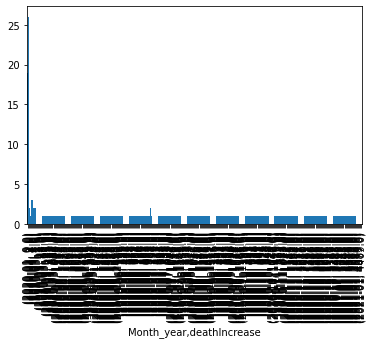

In [21]:
death_bar = month_groupby['deathIncrease'].value_counts().plot.bar(width=.8)

In [ ]:
plt.plot(amazon_covid_merge['date'],amazon_covid_merge['deathIncrease'])

In [ ]:
plt.plot(amazon_covid_merge['date'] ,amazon_covid_merge['Close'])

In [ ]:
plt.scatter(amazon_covid_merge['new_datetime'], amazon_covid_merge['Close'], color='k')
plt.scatter(amazon_covid_merge['new_datetime'], amazon_covid_merge['deathIncrease'], color='g')